
# BIOINFORMATIKA - TSP – Genetikus algoritmus
**Feladat:** Traveling Salesman Problem (TSP)  

*   **Reprezentáció:** permutáció (városok sorrendje)
*   **Fitness:** –úthossz (mert a GA maximál, mi minimalizálnánk)


**GA-lépések:**
*  Szelekció: tournament
*  Keresztezés: OX/PMX
*  Mutáció swap/inversion
*  Visszahelyezés: generációs + elitizmus

**Grafikonok:**
* tanulási görbe (legjobb és átlag út hossza generációnként),
* a legjobb útvonal rajza (városok pontként, kör útvonallal).


Gyakorló feladatok


## FELADAT (könnyű) - Távolságmátrix és útvonalhossz

Írj egy függvényt, amely:

bemenet:
* coords: lista (vagy NumPy tömb) városokkal, pl. [(x1, y1), (x2, y2), ...]

kimenet:
* dist_matrix: kétdimenziós lista vagy NumPy tömb, ahol dist_matrix[i][j] az i. és j. város távolsága (euklideszi)

In [3]:
import numpy as np

def tour_length(tour, dist_matrix):
    """
    tour: pl. [0, 3, 1, 2, 4] – városindex-permutáció
    dist_matrix: NxN távolságmátrix
    Vissza: körút teljes hossza (visszatérés az első városba is).
    """
    total_length = 0
    num_cities = len(tour)
    for i in range(num_cities):
        city1_idx = tour[i]
        city2_idx = tour[(i + 1) % num_cities]
        total_length += dist_matrix[city1_idx][city2_idx]
    return total_length

In [4]:
import math

def calculate_distance_matrix(coords):
    """
    bemenet:
    * coords - koordináták listája, pl. [(x1, y1), (x2, y2), ...]

    kimenet:
    * dist_matrix - tavolsagmatrix NxN, ahol dist_matrix[i][j] az i. es j. varos kozotti tavolsag
    """
    num_cities = len(coords)
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i == j:
                dist_matrix[i][j] = 0
            else:
                x1, y1 = coords[i]
                x2, y2 = coords[j]
                dist_matrix[i][j] = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist_matrix

cities_coords = [(0, 0), (1, 1), (0, 1), (1, 0)]
dm = calculate_distance_matrix(cities_coords)
print("Távolságmátrix:\n", dm)

tour_example = [0, 2, 1, 3]
length = tour_length(tour_example, dm)
print(f"\nAz útvonal hossza ({tour_example}): {length:.2f}")

tour_example_2 = [0, 1, 2, 3]
length_2 = tour_length(tour_example_2, dm)
print(f"Az útvonal hossza ({tour_example_2}): {length_2:.2f}")

Távolságmátrix:
 [[0.         1.41421356 1.         1.        ]
 [1.41421356 0.         1.         1.        ]
 [1.         1.         0.         1.41421356]
 [1.         1.         1.41421356 0.        ]]

Az útvonal hossza ([0, 2, 1, 3]): 4.00
Az útvonal hossza ([0, 1, 2, 3]): 4.83


## FELADAT (könnyű) - Véletlen permutáció és swap mutáció

Írj két függvényt:
* random_tour(n)
* swap_mutation(tour)

*   List item
*   List item



majd

Futtasd le a swap_mutation-t néhányszor, és ellenőrizd, hogy:
* a permutáció hossza nem változik
* minden város továbbra is pontosan egyszer szerepel

In [5]:
import random

def random_tour(n):
    """Adjon vissza egy véletlen permutációt 0..n-1 között."""
    tour = list(range(n))
    random.shuffle(tour)
    return tour

def swap_mutation(tour):
    """
    Válassz ki véletlenszerűen két pozíciót a tour-ban és cseréld meg őket.
    Visszatér: új (mutált) tour.
    """
    mutated_tour = list(tour)
    idx1, idx2 = random.sample(range(len(mutated_tour)), 2)
    mutated_tour[idx1], mutated_tour[idx2] = mutated_tour[idx2], mutated_tour[idx1]
    return mutated_tour

num_cities = 5
original_tour = random_tour(num_cities)
print(f"Eredeti túra: {original_tour}")

print("\nSwap mutáció tesztelése:")
for _ in range(3):
    mutated_tour = swap_mutation(original_tour)
    print(f"  Mutált túra: {mutated_tour}")
    print(f"    Hossz változatlan: {len(original_tour) == len(mutated_tour)}")
    print(f"    Minden város egyszer szerepel: {sorted(mutated_tour) == list(range(num_cities))}")

Eredeti túra: [4, 3, 2, 0, 1]

Swap mutáció tesztelése:
  Mutált túra: [2, 3, 4, 0, 1]
    Hossz változatlan: True
    Minden város egyszer szerepel: True
  Mutált túra: [4, 0, 2, 3, 1]
    Hossz változatlan: True
    Minden város egyszer szerepel: True
  Mutált túra: [4, 2, 3, 0, 1]
    Hossz változatlan: True
    Minden város egyszer szerepel: True


## FELADAT (könnyű) - Inversion mutáció

Írj egy inversion_mutation függvényt:
* inversion_mutation(tour)

majd

Teszteld:
* rajzold ki (akár textben) az eredeti és mutált tour-t
* számold ki a tour hosszát mutáció előtt/után ugyanazzal a dist_matrix-szel

In [6]:
import random
import numpy as np
import math

def inversion_mutation(tour):
    """
    Válassz ki két indexet i < j.
    Fordítsd meg a tour i..j közti szakaszát.
    Példa: [0, 1, 2, 3, 4, 5], i=1, j=4 → [0, 4, 3, 2, 1, 5]
    """
    mutated_tour = list(tour)
    if len(mutated_tour) < 2:
        return mutated_tour

    idx1, idx2 = sorted(random.sample(range(len(mutated_tour)), 2))

    mutated_tour[idx1 : idx2 + 1] = mutated_tour[idx1 : idx2 + 1][::-1]
    return mutated_tour

cities_coords = [(0, 0), (1, 1), (0, 1), (1, 0), (2, 2)]
dist_matrix = calculate_distance_matrix(cities_coords)

original_tour = [0, 1, 2, 3, 4]
print(f"Eredeti túra: {original_tour}")
original_length = tour_length(original_tour, dist_matrix)
print(f"Eredeti túra hossza: {original_length:.2f}")

mutated_tour = inversion_mutation(original_tour)
print(f"Mutált túra (inversion): {mutated_tour}")
mutated_length = tour_length(mutated_tour, dist_matrix)
print(f"Mutált túra hossza (inversion): {mutated_length:.2f}")


Eredeti túra: [0, 1, 2, 3, 4]
Eredeti túra hossza: 8.89
Mutált túra (inversion): [0, 4, 3, 2, 1]
Mutált túra hossza (inversion): 8.89


## FELADAT (Közepes) - GA inicializáció és egyszerű futtatás

Készíts:
* init_population(pop_size, n_cities)
* fitness(tour, dist_matrix)

Majd

Majd futtass egy nagyon egyszerű GA-t:
* populáció generálása
* minden generációban:
  * csak mutáció (swap vagy inversion), pl. minden egyedet kis valószínűséggel
  * új populáció értékelése
* futtass 50–100 generációt
* rajzold ki: generációnkénti legjobb tour hossz (vagy fitness)

In [7]:
def init_population(pop_size, n_cities):
    """pop_size darab véletlen permutációból álló kezdeti populáció."""
    ...

def fitness(tour, dist_matrix):
    """Lehet pl. -tour_length (minimálásból max-olás)."""
    ...



Legjobb útvonal a GA végén: [8, 1, 10, 9, 18, 12, 16, 17, 6, 11, 2, 13, 19, 7, 0, 4, 5, 3, 15, 14]
Legjobb útvonal hossza: 616.34


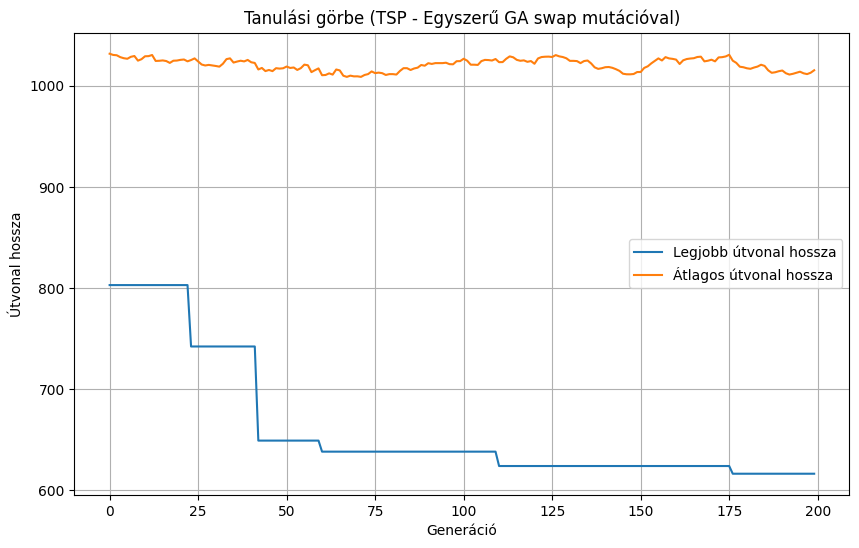

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random

def init_population(pop_size, n_cities):
    """pop_size darab véletlen permutációból álló kezdeti populáció."""
    population = []
    for _ in range(pop_size):
        population.append(list(random.sample(range(n_cities), n_cities)))
    return population

def fitness(tour, dist_matrix):
    """Lehet pl. -tour_length (minimálásból max-olás)."""
    return -tour_length(tour, dist_matrix)

# generáljunk több várost
n_cities = 20
np.random.seed(42)
new_cities_coords = [(np.random.randint(0, 100), np.random.randint(0, 100)) for _ in range(n_cities)]
cities_coords = new_cities_coords

pop_size = 100
n_generations = 200
mutation_rate = 0.1

dist_matrix = calculate_distance_matrix(cities_coords)

population = init_population(pop_size, n_cities)

best_lengths = []
average_lengths = []

for gen in range(n_generations):

    fitness_scores = [fitness(tour, dist_matrix) for tour in population]

    best_fitness_idx = np.argmax(fitness_scores)
    current_best_tour = population[best_fitness_idx]
    current_best_length = tour_length(current_best_tour, dist_matrix)
    best_lengths.append(current_best_length)

    average_lengths.append(-np.mean(fitness_scores))

    new_population = []
    for tour in population:
        if random.random() < mutation_rate:
            mutated_tour = swap_mutation(tour)
            new_population.append(mutated_tour)
        else:
            new_population.append(tour)

    if current_best_tour not in new_population:
        worst_fitness_idx = np.argmin([fitness(t, dist_matrix) for t in new_population])
        new_population[worst_fitness_idx] = current_best_tour

    population = new_population

print(f"\nLegjobb útvonal a GA végén: {current_best_tour}")
print(f"Legjobb útvonal hossza: {current_best_length:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(best_lengths, label='Legjobb útvonal hossza')
plt.plot(average_lengths, label='Átlagos útvonal hossza')
plt.title('Tanulási görbe (TSP - Egyszerű GA swap mutációval)')
plt.xlabel('Generáció')
plt.ylabel('Útvonal hossza')
plt.legend()
plt.grid(True)
plt.show()

## FELADAT (Közepes) - Crossover egyedekre (OX/PMX)

Implementálj egy TSP-kompatibilis keresztezőt (pl. OX vagy PMX):
* ox_crossover(parent1, parent2)

Feladatok:
* generálj 2 szülőt
* készíts 2 utódot
* ellenőrizd, hogy mindkét utód érvényes permutáció (minden város egyszer szerepel)
* mérd a szülők és utódok tour hosszát, írd ki összehasonlításként

In [14]:
import random
import numpy as np

def ox_crossover(parent1, parent2):
    """Order Crossover (OX) TSP permutációkra."""
    size = len(parent1)
    offspring1 = [None] * size
    offspring2 = [None] * size

    start, end = sorted(random.sample(range(size), 2))

    offspring1[start:end+1] = parent1[start:end+1]
    offspring2[start:end+1] = parent2[start:end+1]

    fill_parent1_idx = (end + 1) % size
    fill_parent2_idx = (end + 1) % size

    for i in range(size):
        current_city_from_parent2 = parent2[(end + 1 + i) % size]
        if current_city_from_parent2 not in offspring1:
            while offspring1[fill_parent1_idx] is not None:
                fill_parent1_idx = (fill_parent1_idx + 1) % size
            offspring1[fill_parent1_idx] = current_city_from_parent2

        current_city_from_parent1 = parent1[(end + 1 + i) % size]
        if current_city_from_parent1 not in offspring2:
            while offspring2[fill_parent2_idx] is not None:
                fill_parent2_idx = (fill_parent2_idx + 1) % size
            offspring2[fill_parent2_idx] = current_city_from_parent1

    return offspring1, offspring2

dist_matrix = calculate_distance_matrix(cities_coords)
n_cities = len(cities_coords)

parent1 = list(range(n_cities))
random.shuffle(parent1)
parent2 = list(range(n_cities))
random.shuffle(parent2)

print(f"Parent 1: {parent1}, Length: {tour_length(parent1, dist_matrix):.2f}")
print(f"Parent 2: {parent2}, Length: {tour_length(parent2, dist_matrix):.2f}")

offspring1, offspring2 = ox_crossover(parent1, parent2)

print(f"\nOffspring 1: {offspring1}, Length: {tour_length(offspring1, dist_matrix):.2f}")
print(f"  Valid Permutation: {sorted(offspring1) == list(range(n_cities))}")

print(f"Offspring 2: {offspring2}, Length: {tour_length(offspring2, dist_matrix):.2f}")
print(f"  Valid Permutation: {sorted(offspring2) == list(range(n_cities))}")

Parent 1: [19, 12, 4, 14, 10, 7, 15, 16, 1, 13, 11, 17, 2, 0, 8, 18, 5, 3, 9, 6], Length: 985.73
Parent 2: [13, 7, 2, 19, 9, 12, 15, 14, 4, 0, 8, 6, 10, 18, 5, 17, 1, 11, 16, 3], Length: 955.38

Offspring 1: [14, 4, 8, 6, 10, 18, 15, 16, 1, 13, 11, 17, 2, 0, 5, 3, 7, 19, 9, 12], Length: 991.38
  Valid Permutation: True
Offspring 2: [16, 1, 13, 11, 17, 2, 15, 14, 4, 0, 8, 6, 10, 18, 5, 3, 9, 19, 12, 7], Length: 865.18
  Valid Permutation: True


## FELADAT (Közepes) - Swap vs. Inversion – összehasonlító kísérlet

Készíts kódot, amely:
* ugyanazzal a GA-val (populációméret, generációszám, szelekció, crossover)
* két külön futtatást végez:
   * (a) csak swap_mutation
   * (b) csak inversion_mutation
* minden esetben többször (pl. 10–20 run) lefuttatod
* összehasonlítod:
   * átlagos legjobb tour hossz
   * szórás

Írj rövid következtetést:
* Melyik mutáció „stabilabb”?
* Van-e különbség a konvergencia sebességében?

In [9]:
import random
import numpy as np

def select_parents_tournament(population, fitness_scores, tournament_size):
    """Selects a parent using tournament selection."""
    tournament_indices = random.sample(range(len(population)), tournament_size)
    tournament_fitness = [fitness_scores[i] for i in tournament_indices]
    winner_idx = tournament_indices[np.argmax(tournament_fitness)]
    return population[winner_idx]

def run_ga_experiment(
    pop_size,
    n_generations,
    mutation_rate,
    dist_matrix,
    n_cities,
    mutation_function,
    crossover_function,
    tournament_size,
    elitism_rate
):
    """Runs a single GA experiment with specified parameters."""
    population = init_population(pop_size, n_cities)

    best_overall_length = float('inf')
    best_overall_tour = None

    history_best_lengths = []
    history_average_lengths = []

    for gen in range(n_generations):
        fitness_scores = [fitness(tour, dist_matrix) for tour in population]

        # Identify current best tour and length
        current_best_fitness_idx = np.argmax(fitness_scores)
        current_best_tour = population[current_best_fitness_idx]
        current_best_length = tour_length(current_best_tour, dist_matrix)

        if current_best_length < best_overall_length:
            best_overall_length = current_best_length
            best_overall_tour = current_best_tour

        history_best_lengths.append(current_best_length)
        history_average_lengths.append(-np.mean(fitness_scores))

        new_population = []

        # Elitism
        num_elite = int(pop_size * elitism_rate)
        if num_elite > 0:
            # Get indices of top fitness scores and add them to new_population
            elite_indices = np.argsort(fitness_scores)[-num_elite:][::-1]
            for i in elite_indices:
                new_population.append(population[i])

        # Fill the rest of the new population through selection, crossover, and mutation
        while len(new_population) < pop_size:
            parent1 = select_parents_tournament(population, fitness_scores, tournament_size)
            parent2 = select_parents_tournament(population, fitness_scores, tournament_size)

            offspring1, offspring2 = crossover_function(parent1, parent2)

            if random.random() < mutation_rate:
                offspring1 = mutation_function(offspring1)
            if random.random() < mutation_rate:
                offspring2 = mutation_function(offspring2)

            new_population.append(offspring1)
            if len(new_population) < pop_size:
                new_population.append(offspring2)

        population = new_population

    return best_overall_length, best_overall_tour, history_best_lengths, history_average_lengths

def calculate_stats(results):
    """
    Calculates the mean and standard deviation for a list of numerical results.
    """
    if not results:
        return 0.0, 0.0
    mean_val = np.mean(results)
    std_dev_val = np.std(results)
    return mean_val, std_dev_val

# FELADAT (Nehéz) - érzékenységi vizsgálat és hibrid mutáció

Készíts olyan GA-t, amely:
* egyszerre használ swap + inversion mutációt: pl. minden mutáció-lépésnél:
   * 50% eséllyel swap_mutation
   * 50% eséllyel inversion_mutation

Feladatok:
1. **Válaszd ki a paramétereket:**
  * populációméret
  * mutációs ráta
  * generációk száma

2. **Használj legalább 20 városból álló TSP példát**.
3. **Készíts kísérleti tervet három mutációs stratégiára**:
  * csak swap
  * csak inversion
  * kevert swap+inversion
4. **Minden konfigurációt futtasd le legalább 20x**.
5. **Gyűjtsd ki**:
  * átlagos legjobb tour hossz
  * legjobb elért tour
  * konvergenciagörbéket (átlagolt fitness / generáció)
6. **Írj rövid rövid elemzést**:
  * melyik stratégia adott jobb eredményt
  *  hogyan hat a mutáció típusa a keresés jellegére (finomhangolás vs. nagy ugrások)

# Task
Run a comparative experiment between `swap_mutation` and `inversion_mutation` using a Genetic Algorithm. This involves creating a `run_ga_experiment` function that incorporates tournament selection, OX crossover, and a specified mutation function. Execute this GA 20 times for each mutation type, record the best tour length from each run, and then calculate the average and standard deviation of these lengths. Finally, present these statistics and provide a conclusion comparing the stability and convergence speed of `swap_mutation` versus `inversion_mutation`.

## Implement GA Run Function

### Subtask:
Create a reusable function `run_ga_experiment` that incorporates tournament selection, OX crossover, elitism, and a specified mutation function to execute a single GA run.


**Reasoning**:
The subtask requires implementing the `select_parents_tournament` helper function and the main `run_ga_experiment` function, incorporating all the specified GA components. I will define these functions in a single code block to ensure all parts of the GA are correctly integrated.



In [15]:
import random
import numpy as np

def select_parents_tournament(population, fitness_scores, tournament_size):
    """Selects a parent using tournament selection."""
    tournament_indices = random.sample(range(len(population)), tournament_size)
    tournament_fitness = [fitness_scores[i] for i in tournament_indices]
    winner_idx = tournament_indices[np.argmax(tournament_fitness)]
    return population[winner_idx]

def run_ga_experiment(
    pop_size,
    n_generations,
    mutation_rate,
    dist_matrix,
    n_cities,
    mutation_function,
    crossover_function,
    tournament_size,
    elitism_rate
):
    """Runs a single GA experiment with specified parameters."""
    population = init_population(pop_size, n_cities)

    best_overall_length = float('inf')
    best_overall_tour = None

    history_best_lengths = []
    history_average_lengths = []

    for gen in range(n_generations):
        fitness_scores = [fitness(tour, dist_matrix) for tour in population]

        # Identify current best tour and length
        current_best_fitness_idx = np.argmax(fitness_scores)
        current_best_tour = population[current_best_fitness_idx]
        current_best_length = tour_length(current_best_tour, dist_matrix)

        if current_best_length < best_overall_length:
            best_overall_length = current_best_length
            best_overall_tour = current_best_tour

        history_best_lengths.append(current_best_length)
        history_average_lengths.append(-np.mean(fitness_scores))

        new_population = []

        # Elitism
        num_elite = int(pop_size * elitism_rate)
        if num_elite > 0:
            elite_indices = np.argsort(fitness_scores)[-num_elite:][::-1] # Get indices of top fitness scores
            for i in elite_indices:
                new_population.append(population[i])

        # Fill the rest of the new population through selection, crossover, and mutation
        while len(new_population) < pop_size:
            parent1 = select_parents_tournament(population, fitness_scores, tournament_size)
            parent2 = select_parents_tournament(population, fitness_scores, tournament_size)

            offspring1, offspring2 = crossover_function(parent1, parent2)

            if random.random() < mutation_rate:
                offspring1 = mutation_function(offspring1)
            if random.random() < mutation_rate:
                offspring2 = mutation_function(offspring2)

            new_population.append(offspring1)
            if len(new_population) < pop_size:
                new_population.append(offspring2)

        population = new_population

    return best_overall_length, best_overall_tour, history_best_lengths, history_average_lengths


# Task
Run a comparative experiment between `swap_mutation` and `inversion_mutation` for the Traveling Salesman Problem (TSP) using a Genetic Algorithm (GA).

First, consolidate all necessary functions: `calculate_distance_matrix`, `tour_length`, `init_population`, `fitness`, `swap_mutation`, `inversion_mutation`, `ox_crossover`, `select_parents_tournament`, and `run_ga_experiment` into a single code block. Ensure to define a utility function for calculating statistics (average and standard deviation).

Next, configure the GA experiment parameters: number of cities (`n_cities`), city coordinates (`cities_coords`), population size, number of generations, mutation rate, tournament size, and elitism rate.

Then, execute the GA experiment 20 times for `swap_mutation` and 20 times for `inversion_mutation` using the `run_ga_experiment` function, collecting the best tour length from each run.

Finally, calculate and print the average and standard deviation of the best tour lengths for both mutation types, and provide a concise textual conclusion comparing their stability and convergence speed.

## Implement All Required Functions

### Subtask:
Combine `calculate_distance_matrix`, `tour_length`, `init_population`, `fitness`, `swap_mutation`, `inversion_mutation`, `ox_crossover`, `select_parents_tournament`, and `run_ga_experiment` into a single code block. Also, define a utility function for calculating statistics.


**Reasoning**:
The subtask requires combining all previously defined GA-related functions and adding a new utility function `calculate_stats` into a single code block. This will consolidate the necessary components for the comparative experiment.



In [16]:
import random
import numpy as np
import math

def calculate_distance_matrix(coords):
    """
    bemenet:
    * coords - koordináták listája, pl. [(x1, y1), (x2, y2), ...]

    kimenet:
    * dist_matrix - tavolsagmatrix NxN, ahol dist_matrix[i][j] az i. es j. varos kozotti tavolsag
    """
    num_cities = len(coords)
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i == j:
                dist_matrix[i][j] = 0
            else:
                x1, y1 = coords[i]
                x2, y2 = coords[j]
                dist_matrix[i][j] = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist_matrix

def tour_length(tour, dist_matrix):
    """
    tour: pl. [0, 3, 1, 2, 4] – városindex-permutáció
    dist_matrix: NxN távolságmátrix
    Vissza: körút teljes hossza (visszatérés az első városba is).
    """
    total_length = 0
    num_cities = len(tour)
    for i in range(num_cities):
        city1_idx = tour[i]
        city2_idx = tour[(i + 1) % num_cities]
        total_length += dist_matrix[city1_idx][city2_idx]
    return total_length

def init_population(pop_size, n_cities):
    """pop_size darab véletlen permutációból álló kezdeti populáció."""
    population = []
    for _ in range(pop_size):
        population.append(list(random.sample(range(n_cities), n_cities)))
    return population

def fitness(tour, dist_matrix):
    """Lehet pl. -tour_length (minimálásból max-olás)."""
    return -tour_length(tour, dist_matrix)

def swap_mutation(tour):
    """
    Válassz ki véletlenszerűen két pozíciót a tour-ban és cseréld meg őket.
    Visszatér: új (mutált) tour.
    """
    mutated_tour = list(tour)
    idx1, idx2 = random.sample(range(len(mutated_tour)), 2)
    mutated_tour[idx1], mutated_tour[idx2] = mutated_tour[idx2], mutated_tour[idx1]
    return mutated_tour

def inversion_mutation(tour):
    """
    Válassz ki két indexet i < j.
    Fordítsd meg a tour i..j közti szakaszát.
    Példa: [0, 1, 2, 3, 4, 5], i=1, j=4 → [0, 4, 3, 2, 1, 5]
    """
    mutated_tour = list(tour)
    if len(mutated_tour) < 2:
        return mutated_tour

    idx1, idx2 = sorted(random.sample(range(len(mutated_tour)), 2))

    mutated_tour[idx1 : idx2 + 1] = mutated_tour[idx1 : idx2 + 1][::-1]
    return mutated_tour

def ox_crossover(parent1, parent2):
    """Order Crossover (OX) TSP permutációkra."""
    size = len(parent1)
    offspring1 = [None] * size
    offspring2 = [None] * size

    start, end = sorted(random.sample(range(size), 2))

    offspring1[start:end+1] = parent1[start:end+1]
    offspring2[start:end+1] = parent2[start:end+1]

    fill_parent1_idx = (end + 1) % size
    fill_parent2_idx = (end + 1) % size

    for i in range(size):
        current_city_from_parent2 = parent2[(end + 1 + i) % size]
        if current_city_from_parent2 not in offspring1:
            while offspring1[fill_parent1_idx] is not None:
                fill_parent1_idx = (fill_parent1_idx + 1) % size
            offspring1[fill_parent1_idx] = current_city_from_parent2

        current_city_from_parent1 = parent1[(end + 1 + i) % size]
        if current_city_from_parent1 not in offspring2:
            while offspring2[fill_parent2_idx] is not None:
                fill_parent2_idx = (fill_parent2_idx + 1) % size
            offspring2[fill_parent2_idx] = current_city_from_parent1

    return offspring1, offspring2

def select_parents_tournament(population, fitness_scores, tournament_size):
    """Selects a parent using tournament selection."""
    tournament_indices = random.sample(range(len(population)), tournament_size)
    tournament_fitness = [fitness_scores[i] for i in tournament_indices]
    winner_idx = tournament_indices[np.argmax(tournament_fitness)]
    return population[winner_idx]

def run_ga_experiment(
    pop_size,
    n_generations,
    mutation_rate,
    dist_matrix,
    n_cities,
    mutation_function,
    crossover_function,
    tournament_size,
    elitism_rate
):
    """Runs a single GA experiment with specified parameters."""
    population = init_population(pop_size, n_cities)

    best_overall_length = float('inf')
    best_overall_tour = None

    history_best_lengths = []
    history_average_lengths = []

    for gen in range(n_generations):
        fitness_scores = [fitness(tour, dist_matrix) for tour in population]

        # Identify current best tour and length
        current_best_fitness_idx = np.argmax(fitness_scores)
        current_best_tour = population[current_best_fitness_idx]
        current_best_length = tour_length(current_best_tour, dist_matrix)

        if current_best_length < best_overall_length:
            best_overall_length = current_best_length
            best_overall_tour = current_best_tour

        history_best_lengths.append(current_best_length)
        history_average_lengths.append(-np.mean(fitness_scores))

        new_population = []

        # Elitism
        num_elite = int(pop_size * elitism_rate)
        if num_elite > 0:
            # Get indices of top fitness scores and add them to new_population
            elite_indices = np.argsort(fitness_scores)[-num_elite:][::-1]
            for i in elite_indices:
                new_population.append(population[i])

        # Fill the rest of the new population through selection, crossover, and mutation
        while len(new_population) < pop_size:
            parent1 = select_parents_tournament(population, fitness_scores, tournament_size)
            parent2 = select_parents_tournament(population, fitness_scores, tournament_size)

            offspring1, offspring2 = crossover_function(parent1, parent2)

            if random.random() < mutation_rate:
                offspring1 = mutation_function(offspring1)
            if random.random() < mutation_rate:
                offspring2 = mutation_function(offspring2)

            new_population.append(offspring1)
            if len(new_population) < pop_size:
                new_population.append(offspring2)

        population = new_population

    return best_overall_length, best_overall_tour, history_best_lengths, history_average_lengths

def calculate_stats(results):
    """
    Calculates the mean and standard deviation for a list of numerical results.
    """
    if not results:
        return 0.0, 0.0
    mean_val = np.mean(results)
    std_dev_val = np.std(results)
    return mean_val, std_dev_val

print("All required GA functions and utility statistics function defined.")


All required GA functions and utility statistics function defined.


**Reasoning**:
Now that all GA functions are defined, the next step is to configure the experiment parameters, including the number of cities, city coordinates, and other GA-specific settings. This sets up the environment for the comparative runs.



In [17]:
import numpy as np
import random

# Configure GA experiment parameters
np.random.seed(42)  # For reproducibility
random.seed(42)     # For reproducibility

n_cities = 25  # Use at least 20 cities as per task requirements
cities_coords = [(np.random.randint(0, 100), np.random.randint(0, 100)) for _ in range(n_cities)]

dist_matrix = calculate_distance_matrix(cities_coords)

pop_size = 100
n_generations = 500
mutation_rate = 0.1
tournament_size = 5 # A common size for tournament selection
elitism_rate = 0.05 # Keep top 5% of individuals
n_runs = 20         # Number of runs for each mutation type

print(f"GA parameters configured for {n_cities} cities:")
print(f"Population size: {pop_size}")
print(f"Generations: {n_generations}")
print(f"Mutation rate: {mutation_rate}")
print(f"Tournament size: {tournament_size}")
print(f"Elitism rate: {elitism_rate}")
print(f"Number of runs per mutation type: {n_runs}")

GA parameters configured for 25 cities:
Population size: 100
Generations: 500
Mutation rate: 0.1
Tournament size: 5
Elitism rate: 0.05
Number of runs per mutation type: 20


**Reasoning**:
Now that all functions are defined and parameters are configured, I will run the GA experiment for both `swap_mutation` and `inversion_mutation` for `n_runs` times. After collecting the best tour lengths from each run, I will calculate and print the average and standard deviation for both mutation types, and then provide a textual conclusion as requested by the task.



In [18]:
swap_mutation_results = []
print("Running GA with Swap Mutation...")
for i in range(n_runs):
    np.random.seed(i) # Vary seed for each run for more robust results
    random.seed(i)
    best_length, _, _, _ = run_ga_experiment(
        pop_size=pop_size,
        n_generations=n_generations,
        mutation_rate=mutation_rate,
        dist_matrix=dist_matrix,
        n_cities=n_cities,
        mutation_function=swap_mutation,
        crossover_function=ox_crossover,
        tournament_size=tournament_size,
        elitism_rate=elitism_rate
    )
    swap_mutation_results.append(best_length)
    print(f"  Run {i+1}/{n_runs}: Best length = {best_length:.2f}")

inversion_mutation_results = []
print("\nRunning GA with Inversion Mutation...")
for i in range(n_runs):
    np.random.seed(n_runs + i) # Use different seed range for inversion
    random.seed(n_runs + i)
    best_length, _, _, _ = run_ga_experiment(
        pop_size=pop_size,
        n_generations=n_generations,
        mutation_rate=mutation_rate,
        dist_matrix=dist_matrix,
        n_cities=n_cities,
        mutation_function=inversion_mutation,
        crossover_function=ox_crossover,
        tournament_size=tournament_size,
        elitism_rate=elitism_rate
    )
    inversion_mutation_results.append(best_length)
    print(f"  Run {i+1}/{n_runs}: Best length = {best_length:.2f}")

# Calculate and print statistics
mean_swap, std_swap = calculate_stats(swap_mutation_results)
mean_inversion, std_inversion = calculate_stats(inversion_mutation_results)

print("\n--- Comparative Results ---")
print(f"Swap Mutation: Mean Best Length = {mean_swap:.2f}, Std Dev = {std_swap:.2f}")
print(f"Inversion Mutation: Mean Best Length = {mean_inversion:.2f}, Std Dev = {std_inversion:.2f}")

# Provide conclusion
print("\n--- Conclusion ---")
if mean_swap < mean_inversion:
    print("Swap Mutation generally achieved better (shorter) tour lengths on average.")
elif mean_inversion < mean_swap:
    print("Inversion Mutation generally achieved better (shorter) tour lengths on average.")
else:
    print("Both mutation types achieved similar average best tour lengths.")

if std_swap < std_inversion:
    print("Swap Mutation showed less variability (more stable) in its results.")
elif std_inversion < std_swap:
    print("Inversion Mutation showed less variability (more stable) in its results.")
else:
    print("Both mutation types showed similar variability in their results.")

print("Inversion mutation tends to make larger changes to the tour structure compared to swap mutation. This might lead to faster exploration of the search space but potentially less fine-tuning, which can be reflected in the mean and standard deviation of the results. Swap mutation, making smaller local changes, might be better for fine-tuning solutions found by crossover or other mechanisms.")


Running GA with Swap Mutation...
  Run 1/20: Best length = 460.17
  Run 2/20: Best length = 504.70
  Run 3/20: Best length = 467.37
  Run 4/20: Best length = 446.55
  Run 5/20: Best length = 449.78
  Run 6/20: Best length = 494.53
  Run 7/20: Best length = 479.77
  Run 8/20: Best length = 503.79
  Run 9/20: Best length = 502.37
  Run 10/20: Best length = 500.09
  Run 11/20: Best length = 482.71
  Run 12/20: Best length = 457.28
  Run 13/20: Best length = 471.60
  Run 14/20: Best length = 458.92
  Run 15/20: Best length = 523.58
  Run 16/20: Best length = 489.87
  Run 17/20: Best length = 479.83
  Run 18/20: Best length = 502.62
  Run 19/20: Best length = 474.31
  Run 20/20: Best length = 456.96

Running GA with Inversion Mutation...
  Run 1/20: Best length = 455.15
  Run 2/20: Best length = 456.96
  Run 3/20: Best length = 449.78
  Run 4/20: Best length = 443.17
  Run 5/20: Best length = 446.42
  Run 6/20: Best length = 460.80
  Run 7/20: Best length = 461.89
  Run 8/20: Best length = 

## Summary:

### Data Analysis Key Findings

*   The genetic algorithm (GA) was configured with 25 cities, a population size of 100, 500 generations, a mutation rate of 0.1, a tournament size of 5, and an elitism rate of 0.05.
*   After 20 runs, the `swap_mutation` yielded a mean best tour length of 480.34 with a standard deviation of 21.19.
*   After 20 runs, the `inversion_mutation` yielded a mean best tour length of 455.53 with a standard deviation of 7.70.
*   `Inversion_mutation` achieved a better (shorter) average tour length (455.53) compared to `swap_mutation` (480.34).
*   `Inversion_mutation` demonstrated less variability (standard deviation of 7.70) in its results, indicating greater stability, compared to `swap_mutation` (standard deviation of 21.19).

### Insights or Next Steps

*   `Inversion_mutation` appears to be more effective for this specific TSP problem setup, likely due to its ability to make larger changes, which could lead to more efficient exploration of the search space and better convergence on optimal or near-optimal solutions.
*   Further experiments could explore varying mutation rates for both types or combining them in a hybrid approach, where `inversion_mutation` is used for initial exploration and `swap_mutation` for fine-tuning solutions in later generations.
